In [2]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
matplotlib.rcParams["figure.figsize"]=(20,10)

Matplotlib is building the font cache; this may take a moment.


In [3]:
df1=pd.read_csv("Bengaluru_House_Data.csv")
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [4]:
df1.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [5]:
df1.shape

(13320, 9)

In [6]:
df1.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


In [7]:
df1.groupby('area_type').agg('count')

,availability,location,size,society,total_sqft,bath,balcony,price
area_type,,,,,,,,
Built-up Area,2418,2418,2418,1215,2418,2410,2310,2418
Carpet Area,87,87,87,54,87,87,82,87
Plot Area,2025,2025,2009,311,2025,2009,1837,2025
Super built-up Area,8790,8789,8790,6238,8790,8741,8482,8790


In [8]:
df1.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [9]:
column_name=df1.columns
print(column_name)

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')


In [10]:
df2=df1.drop(['area_type','availability','society','balcony'],axis='columns')

In [11]:
df2.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [12]:
df2.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [13]:
df3=df2.dropna() #this rops the null vali rows poori
df2.shape


(13320, 5)

In [14]:
df3.shape

(13246, 5)

In [15]:
df3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [16]:
df3['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [17]:
df3['bhk']=df3['size'].apply(lambda x: int(x.split(' ')[0]))

<ipython-input-17-c379116b8702>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['bhk']=df3['size'].apply(lambda x: int(x.split(' ')[0]))


In [18]:
df3.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [19]:
df3.dtypes

location       object
size           object
total_sqft     object
bath          float64
price         float64
bhk             int64
dtype: object

In [20]:
df3.bhk.unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [21]:
df3[(df3.bhk) >20]

,location,size,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In [22]:
df3.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [23]:
def is_float(x):
    try:
       float(x)
    except:
       return False
    return True

In [24]:
df3['total_sqft'].apply(is_float)

0        True
1        True
2        True
3        True
4        True
         ... 
13315    True
13316    True
13317    True
13318    True
13319    True
Name: total_sqft, Length: 13246, dtype: bool

In [25]:
df3[~df3['total_sqft'].apply(is_float)]  #false vale chaiye hme which are not float

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
...,...,...,...,...,...,...
12975,Whitefield,2 BHK,850 - 1060,2.0,38.190,2
12990,Talaghattapura,3 BHK,1804 - 2273,3.0,122.000,3
13059,Harlur,2 BHK,1200 - 1470,2.0,72.760,2
13265,Hoodi,2 BHK,1133 - 1384,2.0,59.135,2


In [26]:
def convert_sqft_to_num(x):
    token=x.split('-')
    if len(token) == 2:
        return (float(token[0])+float(token[1]))//2
    try :
        return float(x)
    except:
        return None

In [27]:
convert_sqft_to_num('2765')

2765.0

In [28]:
convert_sqft_to_num('1200 - 1470')

1335.0

In [29]:
df4=df3.copy()
df4['total_sqft']=df4['total_sqft'].apply(convert_sqft_to_num)
df4.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


In [30]:
df4[~df4['total_sqft'].apply(is_float)]

,location,size,total_sqft,bath,price,bhk


In [31]:
df4.loc[30]

location      Yelahanka
size              4 BHK
total_sqft       2475.0
bath                4.0
price             186.0
bhk                   4
Name: 30, dtype: object

In [32]:
df4.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


In [33]:
df5=df4.copy()
df5['location'].unique()

array(['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli', ...,
       '12th cross srinivas nagar banshankari 3rd stage',
       'Havanur extension', 'Abshot Layout'], dtype=object)

In [34]:
len(df5['location'].unique())

1304

In [35]:
df5['price_per_sqft']=df5['price']*100000/df5['total_sqft']
df5.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [36]:
df5.location=df5.location.apply(lambda x: x.strip()) #strip is to remove white space

location_stats=df5.groupby('location')['location'].agg('count').sort_values(ascending=False)
print(location_stats)

location
Whitefield               535
Sarjapur  Road           392
Electronic City          304
Kanakpura Road           266
Thanisandra              236
                        ... 
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
Karnataka Shabarimala      1
whitefiled                 1
Name: location, Length: 1293, dtype: int64


In [37]:
len(location_stats[location_stats<=10])

1052

In [38]:
location_stats_less_than_10=location_stats[location_stats<=10]
location_stats_less_than_10

location
Basapura                 10
1st Block Koramangala    10
Gunjur Palya             10
Kalkere                  10
Sector 1 HSR Layout      10
                         ..
1 Giri Nagar              1
Kanakapura Road,          1
Kanakapura main  Road     1
Karnataka Shabarimala     1
whitefiled                1
Name: location, Length: 1052, dtype: int64

In [39]:
len(df5.location.unique())

1293

In [40]:
df5.location=df5.location.apply(lambda x: 'other' if x in location_stats_less_than_10 else x)

In [41]:
df5.head(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
5,Whitefield,2 BHK,1170.0,2.0,38.00,2,3247.863248
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4,7467.057101
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4,18181.818182
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3,4828.244275
9,other,6 Bedroom,1020.0,6.0,370.00,6,36274.509804


In [42]:
len(df5.location.unique())

242

In [43]:
df5[df5.total_sqft /df5.bhk <300 ].head()   #300 hota hai ek bedroom ka common size

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,100.0,3,20000.000000


In [44]:
df5.shape

(13246, 7)

In [45]:
df6=df5[~(df5.total_sqft /df5.bhk <300 )]

In [46]:
df6.shape

(12502, 7)

In [47]:
df6.price_per_sqft.describe()

count     12456.000000
mean       6308.513707
std        4168.123545
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [48]:
def remove_pps_outliers(df):
    df_out=pd.DataFrame()
    for key,subdf in df.groupby('location'): #key will be location us location vali rows mila k dataframe goes in subdf
        m=np.mean(subdf.price_per_sqft)
        st= np.std(subdf.price_per_sqft)
        reduced_df=subdf[(subdf['price_per_sqft'] >(m-st))& (subdf['price_per_sqft'] <=(m+st))]
        df_out=pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out

df7=remove_pps_outliers(df6)
df7.shape

(10241, 7)

In [49]:
def scatter_plot_chart(df,location):
     bhk2 = df[(df.location == location )& (df.bhk==2)]
     bhk3= df[(df.location== location) & (df.bhk ==3)]
     matplotlib.rcParams['figure.figsize']=(15,10)
     plt.scatter(bhk2.total_sqft , bhk2.price , color='blue', label='2 BHK',s=50 )
     plt.scatter(bhk3.total_sqft, bhk3.price , color='green' , marker='+',label='3 BHK' ,s=50)
     plt.xlabel('Total Square Feet Area')
     plt.ylabel('Price Per Square Feet')
     plt.title(location)
     plt.legend()

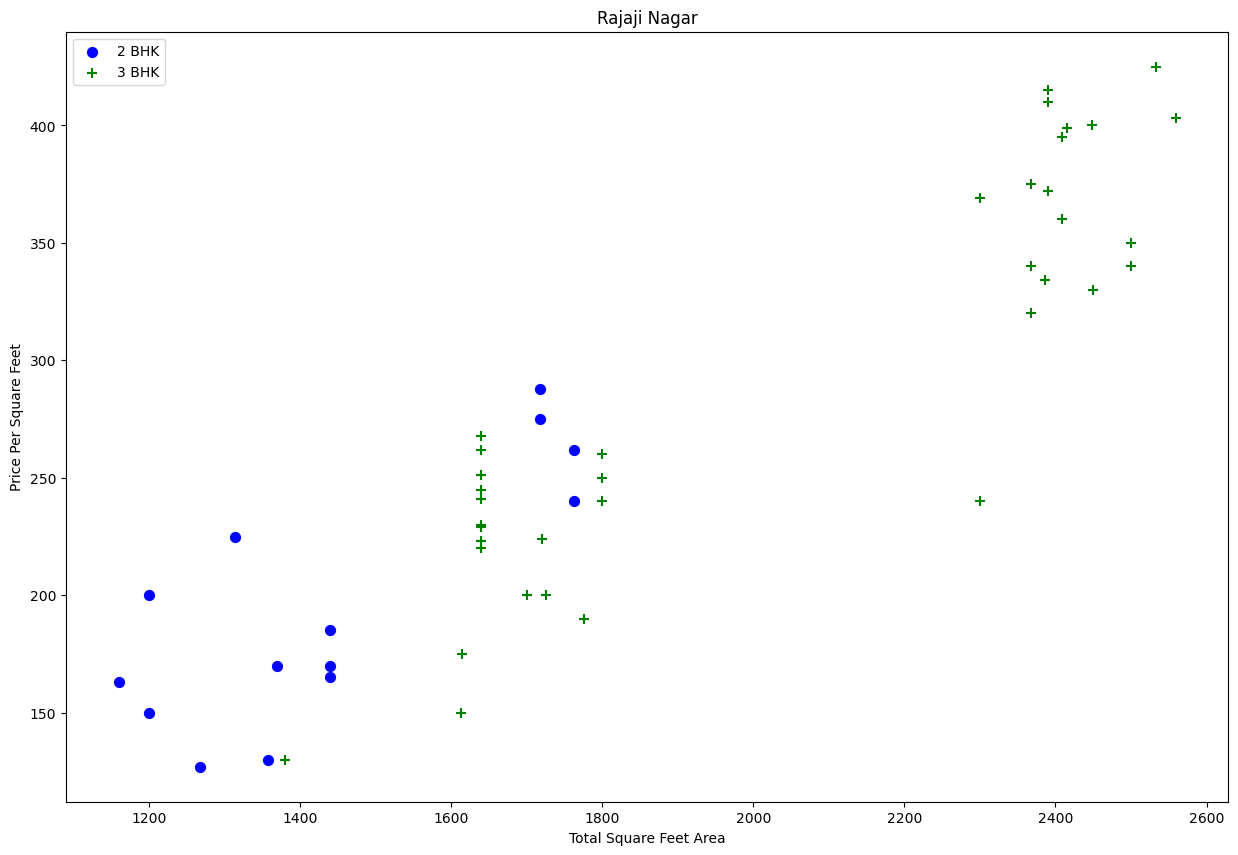

In [50]:
scatter_plot_chart(df7,"Rajaji Nagar")

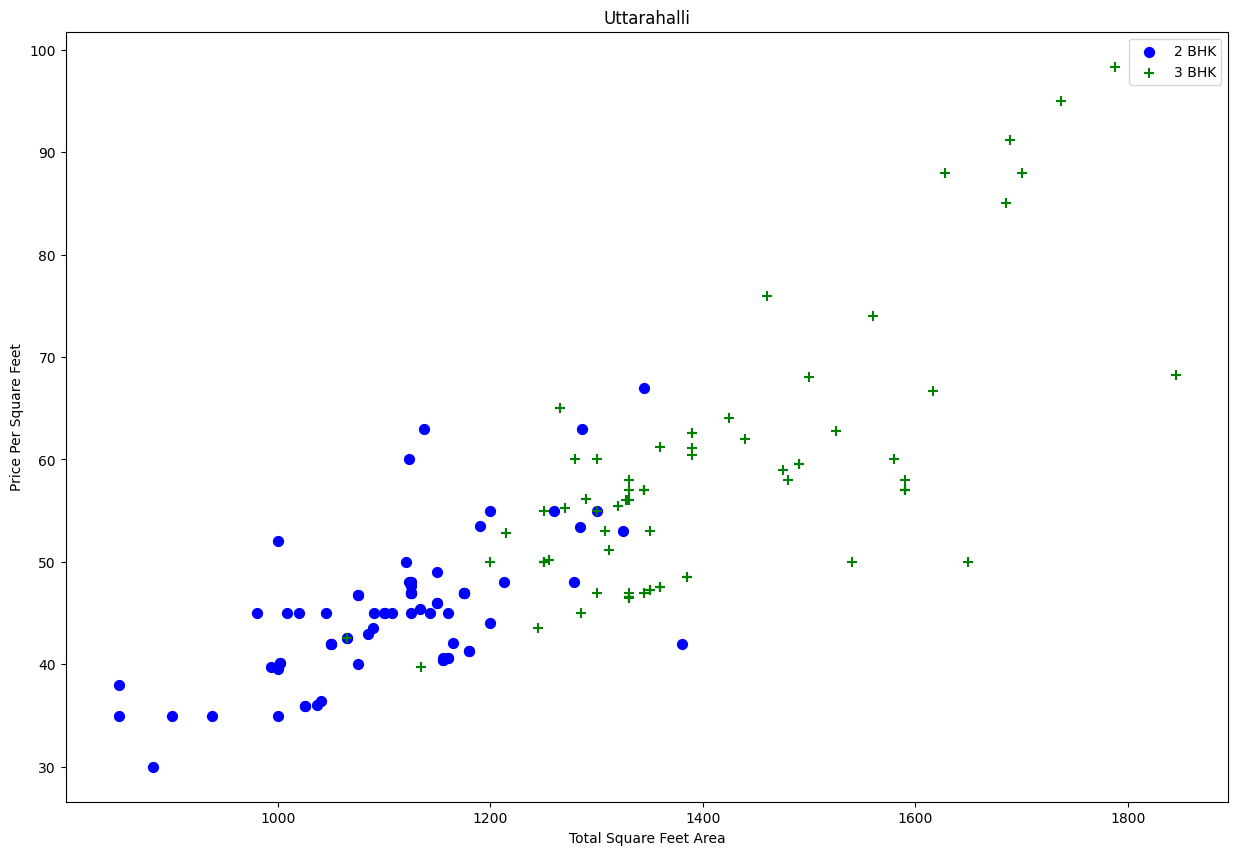

In [52]:
scatter_plot_chart(df7,"Uttarahalli")

In [68]:
def remove_bhk_outliers(df):
    exclude_indices=np.array([])
    for location ,location_df in df.groupby('location'):
        bhk_stats={}
        for bhk,bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk]= {
                'mean':np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count':bhk_df.shape[0]
            }
        for bhk,bhk_df in location_df.groupby('bhk'):
            stats=bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices=np.append(exclude_indices,bhk_df[bhk_df.price_per_sqft < (stats['mean'])].index.values)
         
    return df.drop(exclude_indices,axis='index')

# def remove_bhk_outliers(df):
#     bad_indices = []

#     for loc, loc_df in df.groupby('location'):
#         bhk_stats = {}

#         for bhk, subdf in loc_df.groupby('bhk'):
#             bhk_stats[bhk] = {
#                 'mean': subdf['price_per_sqft'].mean(),
#                 'std': subdf['price_per_sqft'].std(),
#                 'count': len(subdf)
#             }

#         for bhk, subdf in loc_df.groupby('bhk'):
#             lower_stats = bhk_stats.get(bhk - 1)
#             if lower_stats and lower_stats['count'] > 5:
#                 bad = subdf[subdf['price_per_sqft'] < lower_stats['mean']].index
#                 bad_indices.extend(bad)

#     return df.drop(bad_indices)





In [71]:
df8=remove_bhk_outliers(df7)
df8.shape

(7329, 7)

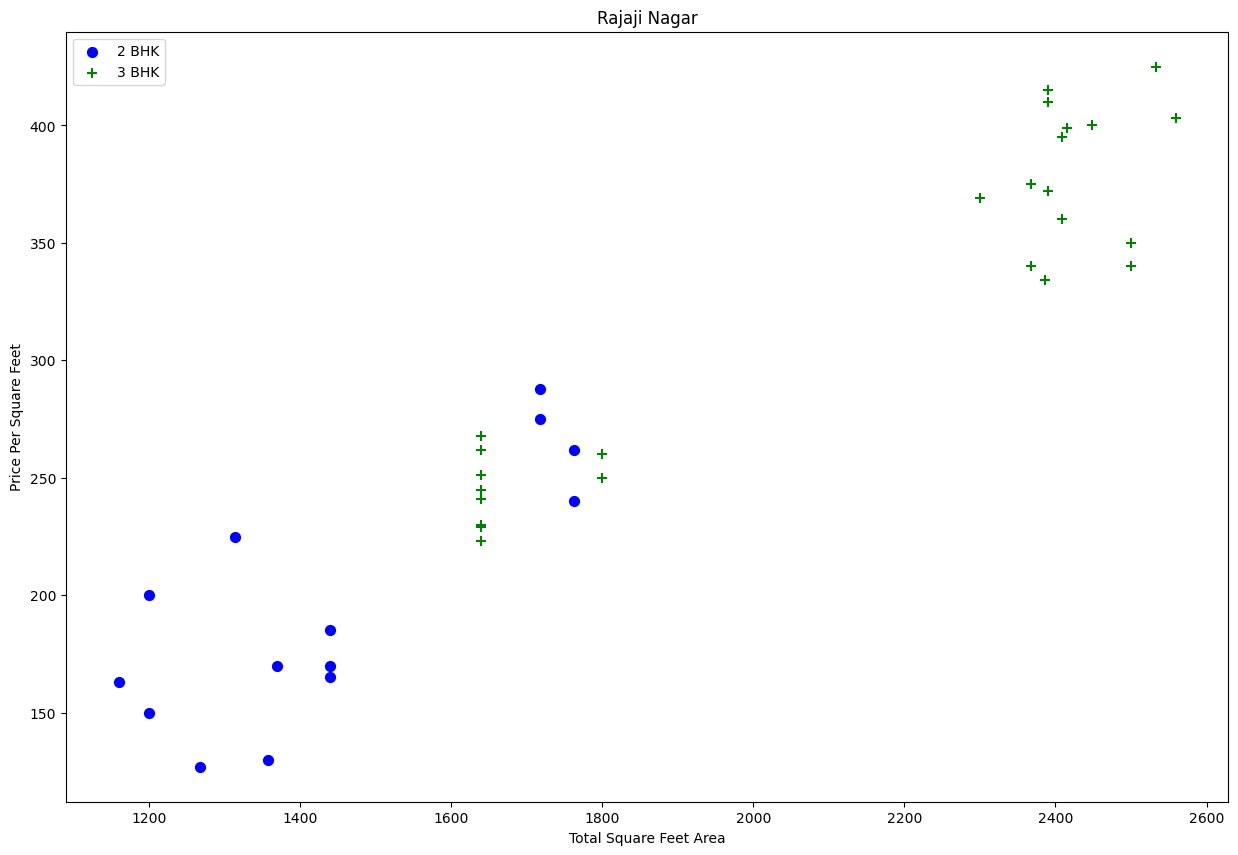

In [73]:
scatter_plot_chart(df8,"Rajaji Nagar")

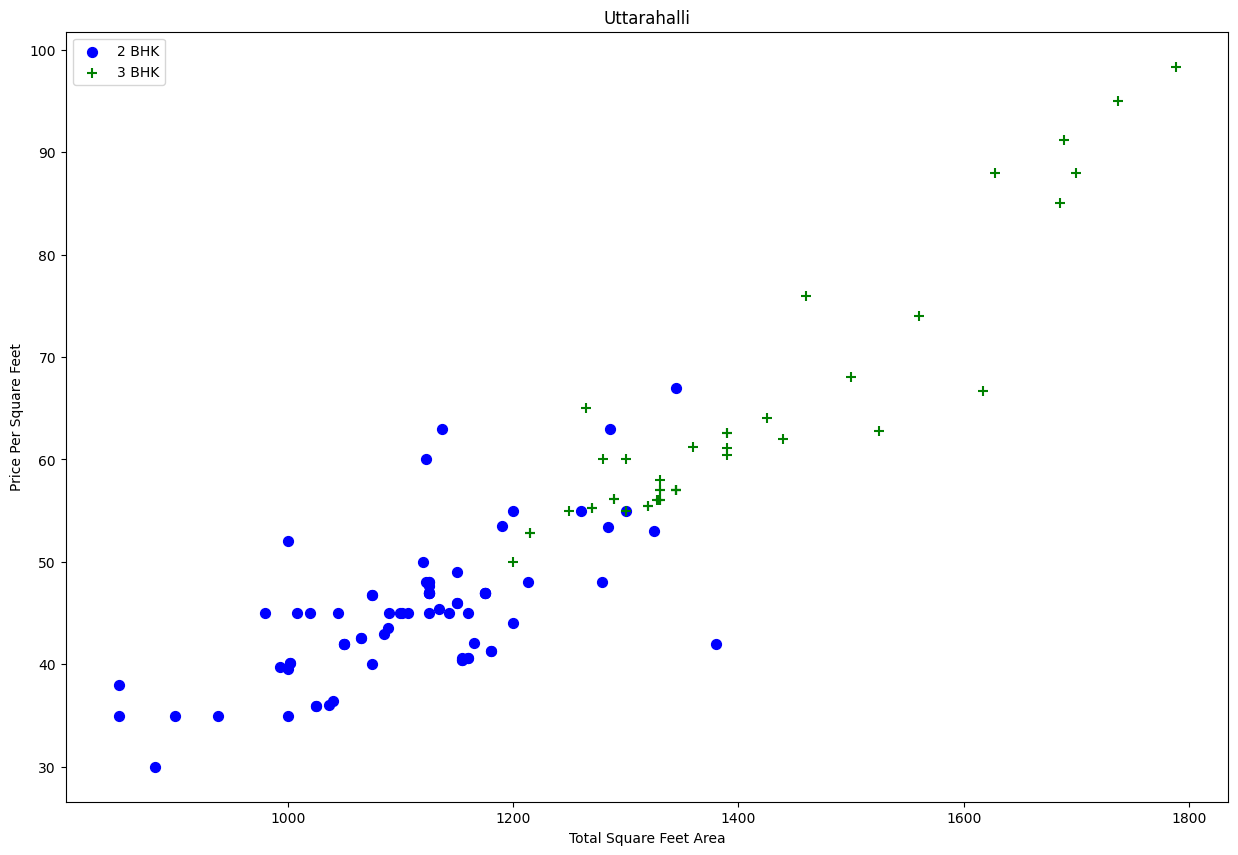

In [74]:
scatter_plot_chart(df8,"Uttarahalli")

[]

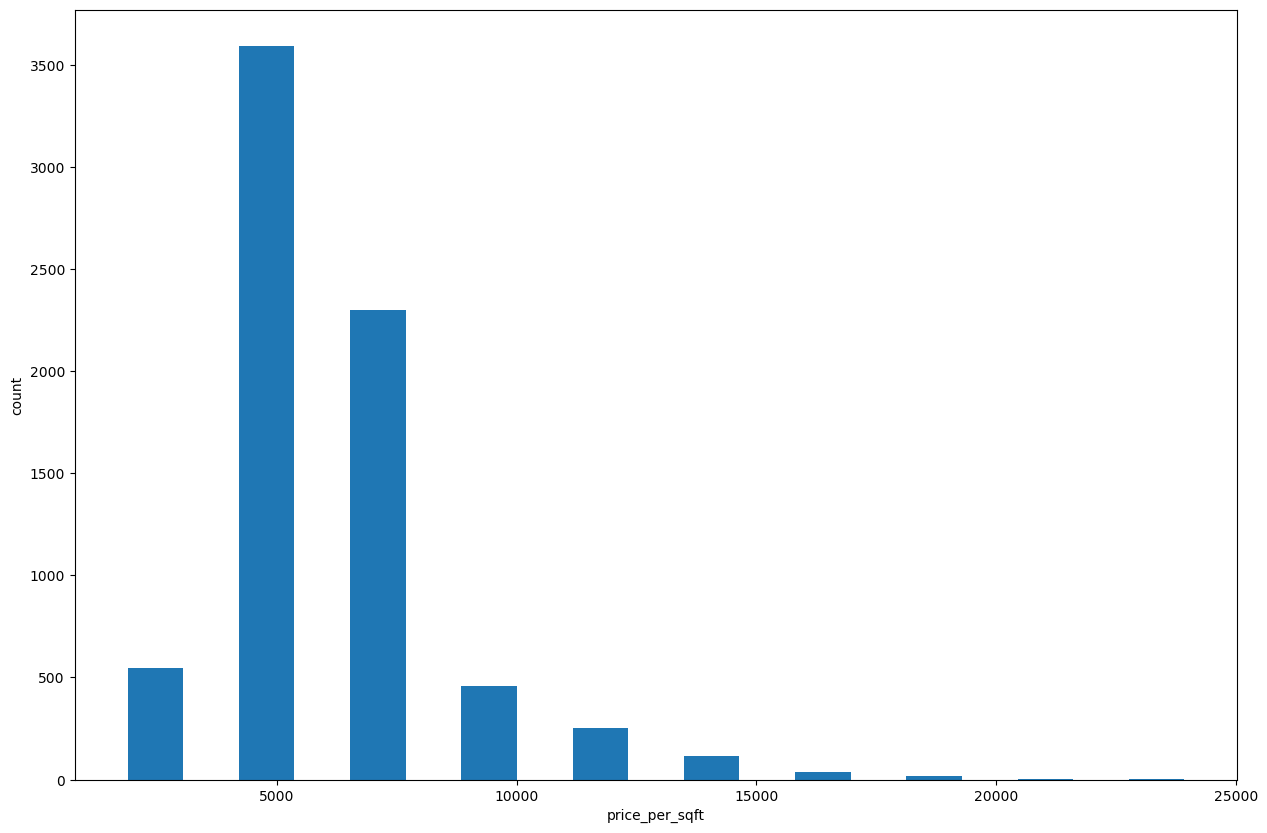

In [79]:
plt.hist(df8['price_per_sqft'],rwidth=0.5)
plt.xlabel('price_per_sqft')
plt.ylabel('count')
plt.plot()

In [80]:
df8.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.0,4,15017.543860
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.0,3,11901.840491
2,1st Block Jayanagar,3 BHK,1875.0,2.0,235.0,3,12533.333333
3,1st Block Jayanagar,3 BHK,1200.0,2.0,130.0,3,10833.333333
4,1st Block Jayanagar,2 BHK,1235.0,2.0,148.0,2,11983.805668


In [81]:
df8.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

In [82]:
df8.bath >10

0        False
1        False
2        False
3        False
4        False
         ...  
10232    False
10233    False
10236    False
10237    False
10240    False
Name: bath, Length: 7329, dtype: bool

In [83]:
df8[df8.bath>10]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
5277,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,4000.000000
8486,other,10 BHK,12000.0,12.0,525.0,10,4375.000000
8575,other,16 BHK,10000.0,16.0,550.0,16,5500.000000
9308,other,11 BHK,6000.0,12.0,150.0,11,2500.000000
9639,other,13 BHK,5425.0,13.0,275.0,13,5069.124424


In [93]:
df9=df8[df8.bath < df8.bhk+2]
df8.shape

(7329, 7)

In [94]:
df9.shape

(7251, 7)

In [113]:
df10=df9.drop(['size','price_per_sqft'],axis=1)
df10.shape


(7251, 5)

In [128]:
dummies=pd.get_dummies(df10['location'],dtype=int)
dummies.drop('other',axis=1)

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10232,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10233,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10236,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10237,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [129]:
df10=df10.reset_index(drop=True)
dummies=dummies.reset_index(drop=True)

In [130]:
df11=pd.concat([df10,dummies],axis=1)
df11.head()

,location,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1st Block Jayanagar,2850.0,4.0,428.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,194.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2.0,235.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,1200.0,2.0,130.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,1235.0,2.0,148.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [131]:
df11.isnull().sum()

location              0
total_sqft            0
bath                  0
price                 0
bhk                   0
                     ..
Yelahanka             0
Yelahanka New Town    0
Yelenahalli           0
Yeshwanthpur          0
other                 0
Length: 247, dtype: int64

In [132]:
df12=df11.drop('location',axis='columns')
df12.shape

(7251, 246)

In [133]:
df12.head(2)

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,2850.0,4.0,428.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [135]:
X=df12.drop(['price'],axis=1)

In [136]:
Y=df12.price

In [137]:
from sklearn.model_selection import train_test_split

In [138]:
X_train,X_test,Y_train,Y_test= train_test_split(X,Y,test_size=0.2,random_state=10)

In [140]:
from sklearn.linear_model import LinearRegression


In [141]:
lr=LinearRegression()

In [142]:
lr.fit(X_train,Y_train)


LinearRegression()

In [143]:
lr.score(X_test,Y_test)

0.8452294733370058

In [145]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv=ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)

In [147]:
scoress=cross_val_score(LinearRegression(),X,Y,cv=cv)

In [148]:
scoress.mean()

np.float64(0.8164654353187487)

In [162]:
from sklearn.model_selection import GridSearchCV

from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Lasso

def find_best_model_using_GridSearchCV(X,Y):
    algos={ 
        'LinearRegression': {
            'model' : LinearRegression(),
            'params': {
               'fit_intercept' :[True,False],
                'positive':[True,False]
            }
},
       'Lasso' : {
           'model' :Lasso(),
           'params':{
               'alpha': [1,2] ,
               'selection': ['random','cyclic']
           }
}, 
        'DecisiontreeRegressor': {
            'model':DecisionTreeRegressor(),
            'params': {
                'splitter':['best','random'],
                'criterion':['mse','friedman_mse']
            }
        }
}
    scores=[]
    cv= ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
    for algo_name,config in algos.items():
        gs=GridSearchCV(config['model'],config['params'] ,cv=cv,return_train_score=False)
        gs.fit(X,Y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_ ,
            'best_params': gs.best_params_
        })
    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

In [163]:
find_best_model_using_GridSearchCV(X,Y)

/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
4 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
4 fits failed with the following error:
Traceback (most recent call last):
  File "/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/lib/python3.12/site-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/lib/python3.12/site-packages/sklearn/linear_model/_base.py", line 647, in fit
    self.coef_ = optimize.nnls(X, y)[0]
                 ^^^^^^^^^^^^^^^^

,model,best_score,best_params
0,LinearRegression,0.818355,"{'fit_intercept': False, 'positive': False}"
1,Lasso,0.699294,"{'alpha': 1, 'selection': 'random'}"
2,DecisiontreeRegressor,0.768712,"{'criterion': 'friedman_mse', 'splitter': 'best'}"


In [168]:
#linear regression is best so hm vhi use krenge
def predict_price(location,bath,bhk,sqft):
    loc_index=np.where(X.columns==location)[0][0]
    x=np.zeros(len(X.columns))
    x[0]=sqft
    x[1]=bath
    x[2]=bhk
    if loc_index>=0:
        x[loc_index]=1
    return lr.predict([x])[0]   
    

In [169]:
predict_price('Rajaji Nagar',2,3,1000)

/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


np.float64(217.36778455651978)

In [171]:
predict_price('Indira Nagar',2,2,800)

/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


np.float64(165.39512209899596)

In [173]:
predict_price('Indira Nagar',2,3,1600)

/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


np.float64(227.1544106623499)

In [175]:
import pickle
with open('bengaluru_model_ml.pickle','wb') as f:
    pickle.dump(lr,f)

In [176]:
import json
columns={
    'data_columns': [ col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))